In [1]:
from specialist_data import transformed
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

data = transformed.data.copy()
clf = MLPClassifier(
    hidden_layer_sizes=(64,64,64,64,64),
    alpha=0.000001,
    max_iter=2000,
    activation="tanh",
    verbose=10,
    random_state=42,
    tol=0.000005
)

def evolve_stage(clf, stage, interval=2):
    train_data = data.query(f'index > {stage}000 and index < {stage + interval}000')
    test_data = data.query(f'index > {stage + interval}000 and index < {stage + interval*2}000')
    transformed.set_data(train_data)
    clf = clf.partial_fit(transformed.X, transformed.level, ['bad', 'good'])
    transformed.set_data(test_data)
    return clf.score(transformed.X, transformed.level)
    

Iteration 1, loss = 0.67225845
Iteration 2, loss = 0.69892059
Iteration 3, loss = 0.67978082
Iteration 4, loss = 0.66321520
Iteration 5, loss = 0.64257646
Iteration 6, loss = 0.63512890
Iteration 7, loss = 0.60526930
Iteration 8, loss = 0.59306481
Iteration 9, loss = 0.60322600
Iteration 10, loss = 0.57957818
Iteration 11, loss = 0.55709763
Iteration 12, loss = 0.52993219
Iteration 13, loss = 0.53205032


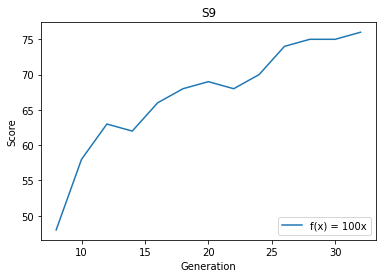

In [2]:
import matplotlib.pyplot as plt
import numpy as np

results = []
stages = []
for stg in range(8, 34, 2):
    r = evolve_stage(clf, stg)
    results.append(int(r*100))
    stages.append(stg)


plt.plot(stages, results)
#title
plt.title('S10')
#labels
plt.xlabel('Generation')
plt.ylabel('Score')
#gridLegend
# plt.grid(True)
plt.legend(['f(x) = 100x'], loc=4)
plt.show()